## Opening the datafile and adding all nessasary libraries.

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 

# Load dataset
df = pd.read_csv("/home/mrbachkani/Projects/Project_Bank_churn_model/bank_churn_data/Churn_Modelling.csv")

# Display first 5 rows
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Check for missing values.

In [21]:
print(df.isnull().sum())


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


## Find all datatypes

In [23]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


## Exploratory data analysis

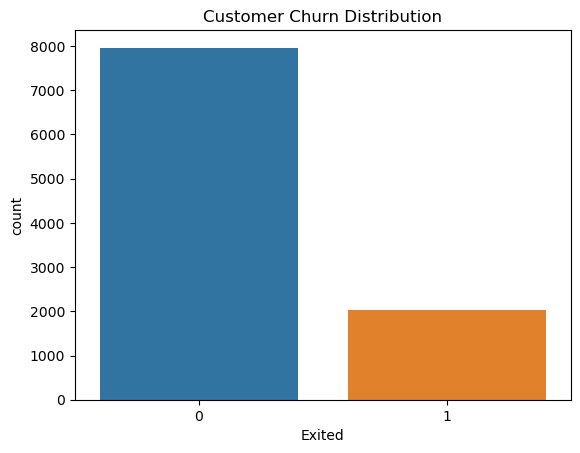

In [25]:
sns.countplot(x="Exited", data=df)
plt.title("Customer Churn Distribution")
plt.show()


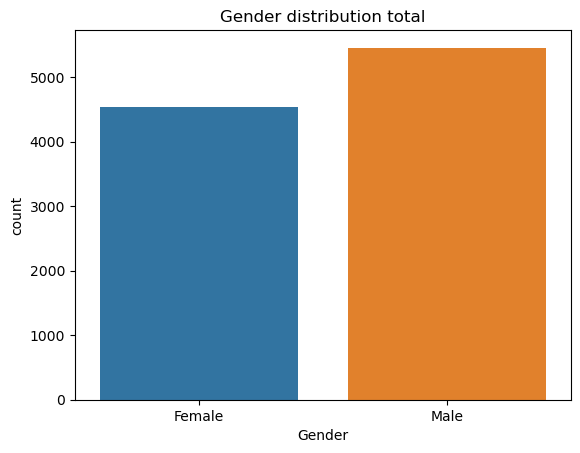

In [26]:
sns.countplot(x="Gender" , data=df)
plt.title("Gender distribution total")
plt.show()

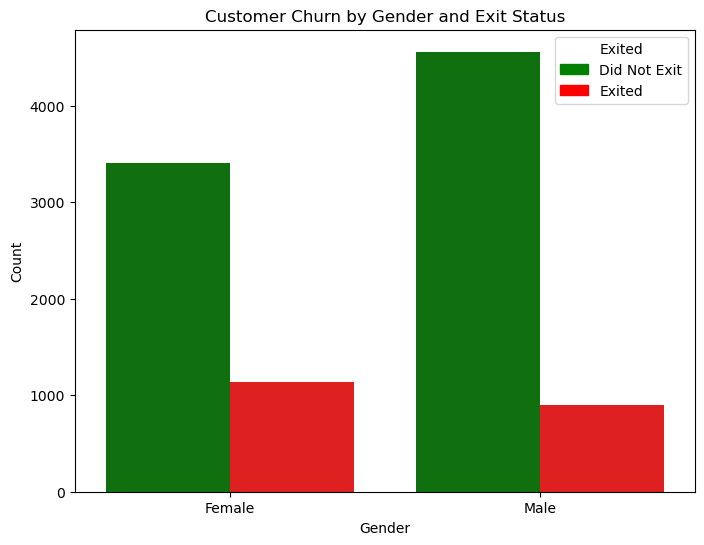

In [27]:
# Ensure 'Exited' is treated as a categorical variable
df['Exited'] = df['Exited'].astype(str)  # Or you can use 'category' type if you prefer

# Group the data by Gender and Exited and count occurrences
gender_exited_counts = df.groupby(['Gender', 'Exited']).size().reset_index(name='Counts')

# Create a custom color palette for the 'Exited' status (red for exited, green for not exited)
palette = {'0': 'green', '1': 'red'}  # '0' = Not Exited, '1' = Exited

# Plot the bar graph with custom colors
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_exited_counts, x='Gender', y='Counts', hue='Exited', palette=palette)

# Add labels and title
plt.title('Customer Churn by Gender and Exit Status')
plt.xlabel('Gender')
plt.ylabel('Count')

# Manually create the legend with custom colors
# Create custom legend handles
handles = [
    mpatches.Patch(color='green', label='Did Not Exit'),
    mpatches.Patch(color='red', label='Exited')
]

# Set the legend
plt.legend(handles=handles, title='Exited')

# Show the plot
plt.show()

In [28]:
geography_counts = df['Geography'].value_counts().reset_index(name='Count')

# Rename columns for better clarity
geography_counts.columns = ['Geography', 'Count']

# Get the top 5 countries by count
top_5_geographies = geography_counts.head(5)

# Display the result
print(top_5_geographies)

  Geography  Count
0    France   5014
1   Germany   2509
2     Spain   2477


## Removing unwanted features and pre-processing the data

### changing categorical data to numerical format

In [31]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)  # One-hot encoding


### Removing unwanted columns

In [33]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)


In [34]:
for column in df.columns:
    if df[column].dtype == 'object':  # Categorical columns
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:  # Numeric columns
        df[column].fillna(df[column].median(), inplace=True)



In [35]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


### Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']] = scaler.fit_transform(df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']])


In [37]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,-0.326221,0,0.293517,2,-1.225848,1,1,1,0.021886,1,False,False
1,-0.440036,0,0.198164,1,0.117350,1,0,1,0.216534,0,False,True
2,-1.536794,0,0.293517,8,1.333053,3,1,0,0.240687,1,False,False
3,0.501521,0,0.007457,1,-1.225848,2,0,0,-0.108918,0,False,False
4,2.063884,0,0.388871,2,0.785728,1,1,1,-0.365276,0,False,True


###  Split Data into Train & Test Sets

In [52]:
from sklearn.model_selection import train_test_split

X = df.drop("Exited", axis=1)  # Features
y = df["Exited"]  # Target Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Train Machine Learning Models

###  Baseline Model (Logistic Regression)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))


Logistic Regression Accuracy: 0.8115


###  Random Forest (Better Performance)

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.866


In [60]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 1.7 MB/s eta 0:00:00m eta 0:00:010:00:06m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 MB 1.3 MB/s eta 0:00:00m eta 0:00:010:00:04


### XGBoost (Best Performance in Most Cases)

In [66]:
# Convert target variables to int
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Initialize XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# Train the model
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)[:, 1]

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy:.4f}")


XGBoost Accuracy: 0.8640


/home/mrbachkani/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:16:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## Evaluate Model Performance

### Classification Report & Confusion Matrix

In [70]:
from sklearn.metrics import classification_report, confusion_matrix

# Convert predicted labels to integers
y_pred = y_pred.astype(int)
y_pred_rf = y_pred_rf.astype(int)
y_pred_xgb = y_pred_xgb.astype(int)

print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred))

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))



Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.20      0.30       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.51      0.60       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76    

 ### ROC-AUC Score (Better for Churn Prediction)

In [72]:
from sklearn.metrics import roc_auc_score

print("ROC-AUC Score (Logistic Regression):", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1]))
print("ROC-AUC Score (Random Forest):", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
print("ROC-AUC Score (XGBoost):", roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]))


ROC-AUC Score (Logistic Regression): 0.7789853867700312
ROC-AUC Score (Random Forest): 0.8574366915736021
ROC-AUC Score (XGBoost): 0.8495370920163218


## Feature Importance Analysis

###  Feature Importance with Random Forest

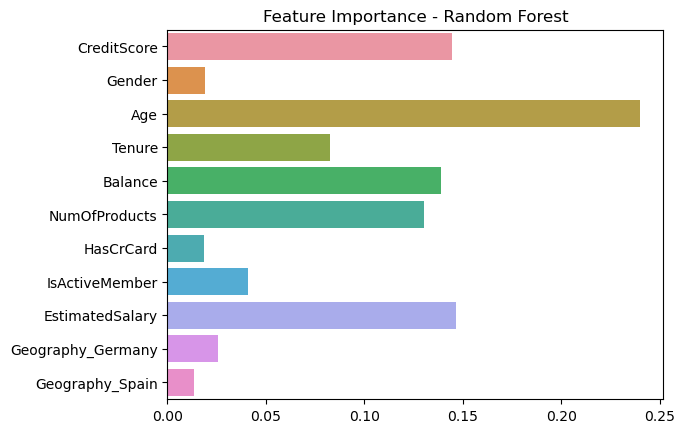

In [74]:
importances = rf.feature_importances_
feature_names = X.columns

# Plot feature importance
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance - Random Forest")
plt.show()


In [78]:
!pip install shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 1.5 MB/s eta 0:00:000:00:010:00:01:010m


### SHAP Values (for XGBoost)

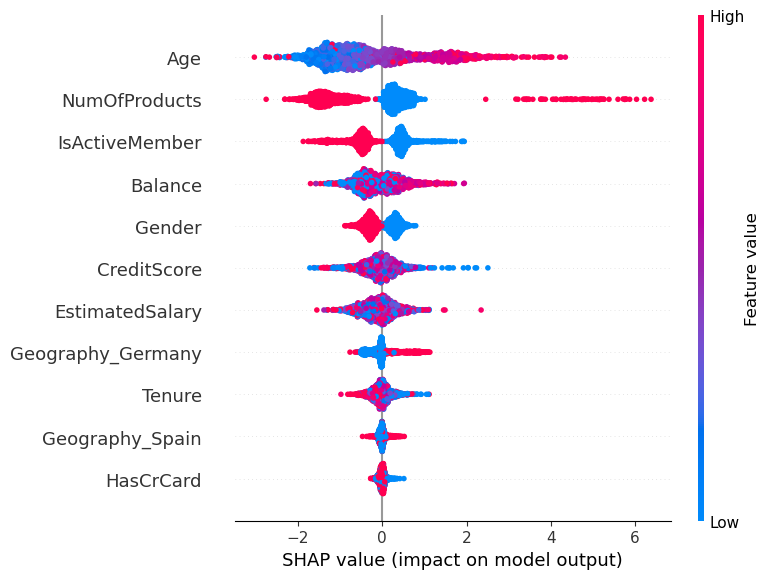

In [80]:
import shap

explainer = shap.Explainer(xgb)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


In [82]:
import pickle

with open("churn_model.pkl", "wb") as f:
    pickle.dump(xgb, f)
